<a href="https://colab.research.google.com/github/moskalikbogdan/CDV/blob/Wstep_Big_Data/Projekt_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pobieranie danych z NYSE**
Branża Lotnicza:
1.  RyanAir (RYAAY)
2.  United Airlines Holdings, Inc. (UAL)
3.  Donw Jones dla Transportu (^DJT)
4.  Jako benchmark stosuję index NASDAQ (^IXIC)

---
Branża wysokich technologii

1. PayPal Holdings, Inc. (PYPL)
2. Technologia podpisów cyfrowych - Docusign Ord Shs (DOCU)
3. Branża IT na przykładzie SAP SE (SAP) 
4. Jako Benchmark zastosowałem - NASDAQ Composite (^IXIC)
5. Samochody elektryczne - Tesla Ord (TSLA)
6. Samochody elektryczne - Nio Inc (NIO)








In [ ]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np


### **Analiza Branży Lotniczej**

In [ ]:
# import notowań Branża Lotnicza
ryanair = pdr.get_data_yahoo('RYAAY', start=dt.datetime(2019,3,1))
UAL = pdr.get_data_yahoo('UAL', start=dt.datetime(2019,3,1))
DonwJones = pdr.get_data_yahoo('^DJT', start=dt.datetime(2019,3,1))
NASDAQ = pdr.get_data_yahoo('^IXIC', start=dt.datetime(2019,3,1))

In [ ]:
ryanair['pct_change'] = ryanair['Adj Close'].pct_change()
UAL['pct_change'] = UAL['Adj Close'].pct_change()
DonwJones['pct_change'] = DonwJones['Adj Close'].pct_change()
NASDAQ['pct_change'] = NASDAQ['Adj Close'].pct_change()


In [ ]:
airlines = pd.concat([ryanair,UAL,DonwJones,NASDAQ],keys=['ryanair', 'UAL','DonwJones','NASDAQ'], names=['Ticker', 'Date'])

In [ ]:
airlines = airlines[['Adj Close']].reset_index().pivot(index = 'Date', columns='Ticker', values='Adj Close')

In [225]:
def compare_airlines (airlines, benchmark):
  benchmark_color_dict = {benchmark: 'red'}
  return (1 + airlines.pct_change()).cumprod().fillna(1).plot(figsize=(15, 8), grid=True, title='Notowania Spółek Lotniczych',color=[benchmark_color_dict.get(x,np.random.rand(3)) for x in airlines.columns])

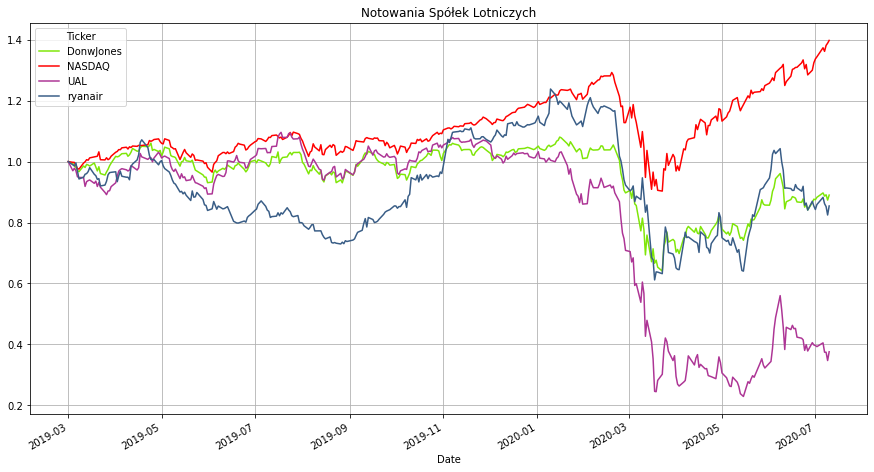

In [227]:
compare_airlines (airlines=airlines,benchmark='NASDAQ')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02e6be87b8>,
      dtype=object)

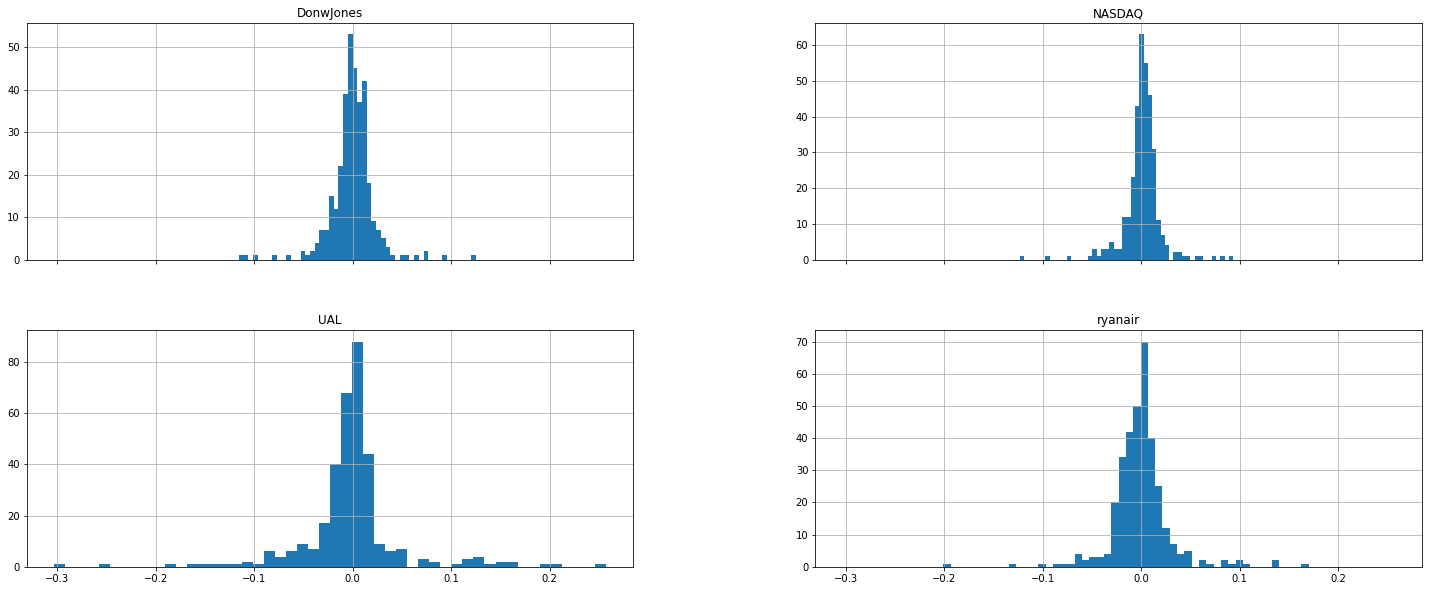

In [211]:
airlines.pct_change().hist(figsize=(25, 10), bins=50, sharex=True)

In [ ]:
airlines['ryanair'].describe()

count    344.000000
mean      71.099273
std       11.242917
min       47.509998
25%       62.807501
50%       70.109997
75%       78.202501
max       96.180000
Name: ryanair, dtype: float64

In [ ]:

airlines ['UAL'].describe()

count    344.000000
mean      71.685174
std       24.563091
min       19.920000
25%       51.027500
50%       84.075001
75%       88.387499
max       95.279999
Name: UAL, dtype: float64

In [ ]:
airlines.pct_change().corr().round(2)

Ticker,DonwJones,NASDAQ,UAL,ryanair
Ticker,,,,
DonwJones,1.00,0.86,0.70,0.67
NASDAQ,0.86,1.00,0.50,0.55
UAL,0.70,0.50,1.00,0.62
ryanair,0.67,0.55,0.62,1.00


In [ ]:
import seaborn as sns

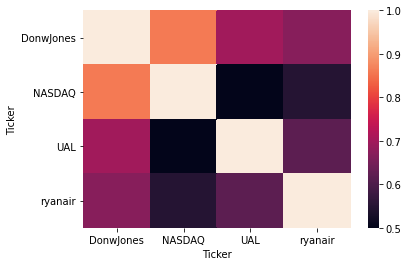

In [328]:
sns.heatmap(airlines.pct_change().corr().round(2))

In [ ]:
airlines2.pct_change().corr().round(2)

Z analizy notowań spółek lotniczych jasno wynika, iż cała branża jest pogrążona w kryzysie wywołanym COVID -19. Wyraźnie mniejsza korelacja obydwu spółek lotniczych do indeksu rynku głównego NASDAQ niż do Dow Jones Transportation pokazuje iż rynek lotniczy głęboko został dotknięty kryzysem, dużo bardziej niż inne branże gospodarki tak USA jak i światowej. Znajduje to również w potwierdzenie w wykresie rozkładu (histogram)- stosunkowo najbardziej zbliżony do rozkładu normalnego jest index NADAQ. Oznacza to iż inwestycje na indeksie głównym są obarczone stosunkowo najmniejszym ryzykiem.
Warte zauważenia jest również to, iż począwszy od początku pandemii wykres zmienności cen RyanAir niemal pokrywa się z indeksem branżowym dla Transportu zatem i korelacja tej spółki z indeksem będzie wysoka. 


**Branża wysokich technologii**

In [269]:
PayPal = pdr.get_data_yahoo('PYPL', start=dt.datetime(2019,3,1))
SAP = pdr.get_data_yahoo('SAP', start=dt.datetime(2019,3,1))
Docu = pdr.get_data_yahoo('DOCU', start=dt.datetime(2019,3,1))
NASDAQ = pdr.get_data_yahoo('^IXIC', start=dt.datetime(2019,3,1))

In [270]:
PayPal['pct_change'] = PayPal['Adj Close'].pct_change()
SAP['pct_change'] = SAP['Adj Close'].pct_change()
Docu['pct_change'] = Docu['Adj Close'].pct_change()
NASDAQ['pct_change'] = NASDAQ['Adj Close'].pct_change()

In [277]:
technologie = pd.concat([PayPal,SAP,Docu,NASDAQ],keys=['PayPal','SAP','Docu','NASDAQ'], names=['Ticker', 'Date'])

In [278]:
technologie = technologie[['Adj Close']].reset_index().pivot(index = 'Date', columns='Ticker', values='Adj Close')

In [279]:
def compare_technologie (technologie, benchmark):
  benchmark_color_dict = {benchmark: 'red'}
  return (1 + technologie.pct_change()).cumprod().fillna(1).plot(figsize=(15, 8), grid=True, title='Notowania Spółek Wysokich Technologii',color=[benchmark_color_dict.get(x,np.random.rand(3)) for x in technologie.columns])

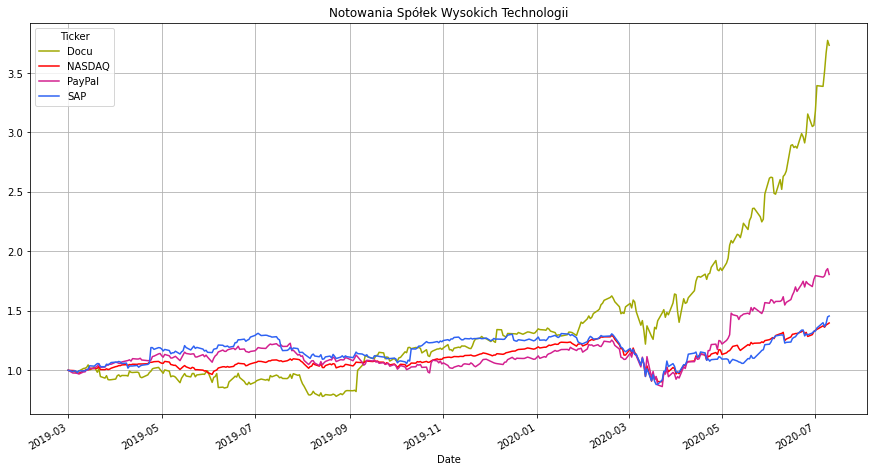

In [280]:
compare_technologie (technologie=technologie,benchmark='NASDAQ')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02e28d4cc0>,
      dtype=object)

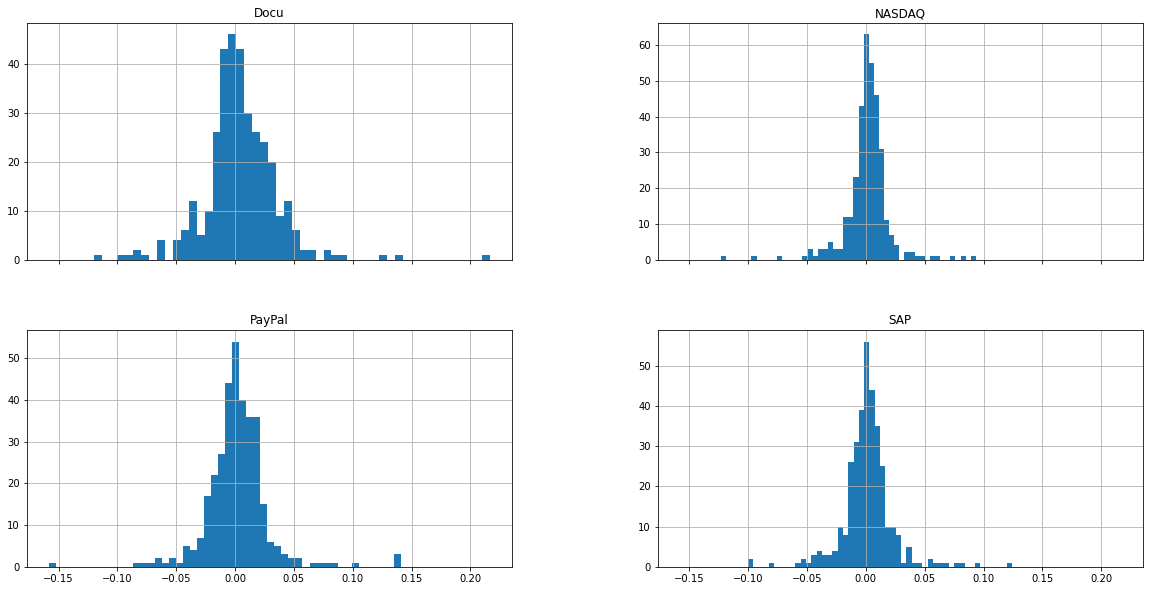

In [281]:
technologie.pct_change().hist(figsize=(20, 10), bins=50, sharex=True)

In [314]:
SAP = pd.DataFrame(data=technologie['SAP'].describe())
PayPal = pd.DataFrame(data=technologie['PayPal'].describe())
Docu = pd.DataFrame(data=technologie['Docu'].describe())


In [319]:
pd.concat([SAP,PayPal, Docu], axis=1)

,SAP,PayPal,Docu
count,344.000000,344.000000,344.000000
mean,123.489653,115.128299,77.296003
std,10.788134,19.000544,33.955755
min,92.773445,85.260002,43.910000
25%,115.530693,104.457499,54.087499
50%,123.985264,109.160000,66.824997
75%,132.928795,116.957499,84.182501
max,153.490005,183.229996,212.419998


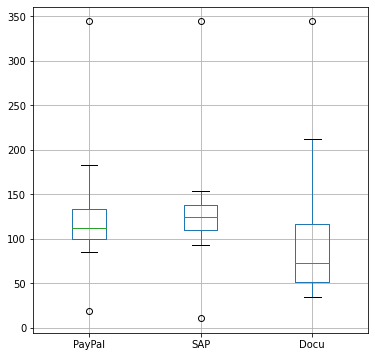

In [323]:

technologie2 = pd.concat([PayPal,SAP,Docu],keys=['PayPal','SAP','Docu'], names=['Ticker', 'Date'])
technologie2.boxplot(figsize=(6, 6))


In [326]:
technologie.pct_change().corr().round(2)

Ticker,Docu,NASDAQ,PayPal,SAP
Ticker,,,,
Docu,1.00,0.44,0.40,0.29
NASDAQ,0.44,1.00,0.83,0.74
PayPal,0.40,0.83,1.00,0.63
SAP,0.29,0.74,0.63,1.00


Porównanie obydwu branż wyraźnie pokazuje, iż wysokie technologie po krótkim okresie obniżenia wyników w ciągu jednego kwartału odrobiły straty. Ponadto są takie Przedsiębiorstwa, które skorzystały na Pandemii. Jest to m.in spółka Docu Sign zajmująca się technologią podpisu cyfrowego - wyraźny, wręcz spektakularny wzrost notowań do poziomów wcześniej nie osiąganych przez spółkę spowodowany jest tym, iż okres izolacji społecznej i przejścia całych gospodarek narodowych na pracę zdalną spowodowało nagły wzrost zainteresowania wszystkimi technologiami, które ułatwiają pracę zdalną.

W drugiej kolejności zauważyć można, że wyrażnie poza trend rynkowy wyznaczany przez NASDAQ wzrasta spółka PayPal odpowiadająca za mikropłatności. Jest to zapewne związane z tym, iż spółka jest liderem rynku obsługującym wszelkie portale, takie jak sklepy internetowe czy platformy rozrywkowe jak np. Netflix, Amazon czy rodzime Allegro.
Zmienność dużych technologicznych Firm IT obsługujący branże przemysłowe, których w tym zestawieniu przedstawicielem jest SAP jest zdecydowanie bardziej skorelowana z indeksem głównym NASDAQ i chociaż w długim okresie czasu współczynnik korelacji PayPal do NASDAQ jest wyższy to wyraźnie widać, że w okresie kryzysu pandemii SAP i temu podobne spółki mają trend niemalpokrywający się z ogólnym trendem rynkowym. 